In [12]:
# Astonishingly there seems to be no clean way to set up the Python path automatically for a script that does not
# reside in the root folder. This will need to be added to all notebooks unless a better solution comes along.
import os, sys
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

import gdown
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datasets.mini_imagenet import MiniImageNet, Split
from datasets.utils import extract_archive

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
ds = MiniImageNet("../../data/mini-imagenet", Split.VAL, download=True)

Computing MD5: /Users/ntraft/Development/data/mini-imagenet/val.tar
MD5 matches: /Users/ntraft/Development/data/mini-imagenet/val.tar
/Users/ntraft/Development/data/mini-imagenet/processed_images/val already exists.


Validation Set statistics:
16 classes
9600 examples


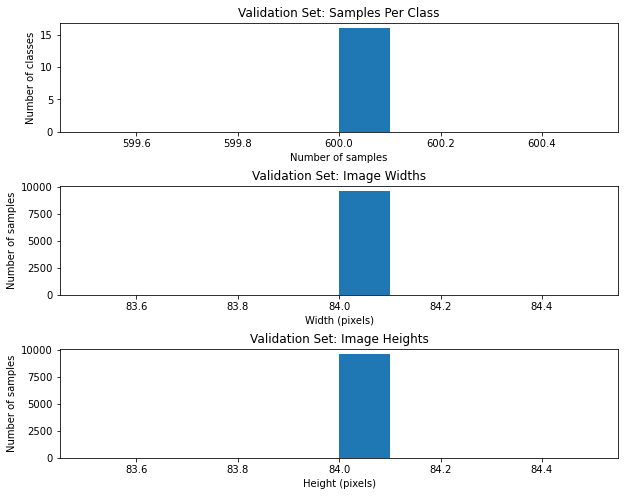

In [14]:
from collections import defaultdict, namedtuple


def show_image_classification_dataset_stats(name, dataset):
    """
    Show statistics for an image classification dataset.
    
    Args:
        name (str): Name of the dataset, like "Training" or "Validation".
        dataset (Dataset): A PyTorch dataset object.
    """
    title = name + " Set"
    print(f"Collecting {title} statistics...", end=" ", flush=True)
    total_size = 0
    class_sizes = []
    widths = []
    heights = []
    class_map = defaultdict(int)
    for img, label in dataset:
        class_map[label] += 1
        widths.append(img.width)
        heights.append(img.height)
    class_sizes = list(class_map.values())
    print("done.")

    print(title, "statistics:")
    print(len(class_map), "classes")
    print(len(dataset), "examples")

    fig, (sax, wax, hax) = plt.subplots(3, figsize=(10, 8), gridspec_kw={"hspace": 0.5})
    sax.hist(class_sizes)
    sax.set_xlabel("Number of samples")
    sax.set_ylabel("Number of classes")
    sax.set_title(f"{title}: Samples Per Class")

    wax.hist(widths)
    wax.set_xlabel("Width (pixels)")
    wax.set_ylabel("Number of samples")
    wax.set_title(f"{title}: Image Widths")

    hax.hist(heights)
    hax.set_xlabel("Height (pixels)")
    hax.set_ylabel("Number of samples")
    hax.set_title(f"{title}: Image Heights")

    
show_image_classification_dataset_stats(str(ds.split), ds)

In [15]:
cdex = ds.class_index
print(len(cdex))
print(f"First class: {cdex[0][0]} to {cdex[0][-1]}")
print(f"Second class: {cdex[1][0]} to {cdex[1][-1]}")
print(f"Last class: {cdex[-1][0]} to {cdex[-1][-1]}")

16
First class: 0 to 599
Second class: 600 to 1199
Last class: 9000 to 9599
